<a href="https://colab.research.google.com/github/ebinujohn/MLS-C01/blob/main/sklearn_src/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Simple Linear Regression

The MSE is 305.97058430971526
Baseline MSE: 685.7889877098512


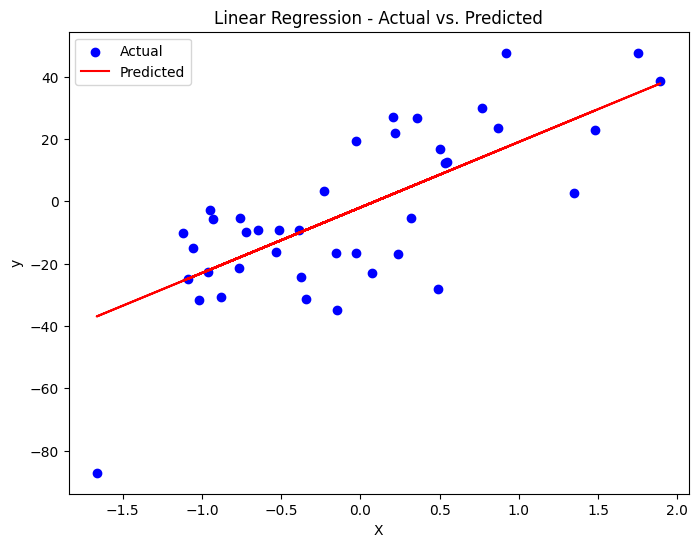

In [2]:
%reset -f
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X, y = make_regression(n_samples=200, n_features=1, noise=20, random_state=13)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=13)
model = make_pipeline(StandardScaler(),LinearRegression())
# model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"The MSE is {mse}")
baseline_predictions = np.full(y_test.shape, y_train.mean())
baseline_mse = mean_squared_error(y_test, baseline_predictions)
print(f"Baseline MSE: {baseline_mse}")


plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression - Actual vs. Predicted')
plt.legend()
plt.show()


## Use KFold Cross Validation with Linear Regression

In [3]:
%reset -f
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score, cross_validate, train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score
import numpy as np

X, y = make_regression(n_samples=50000, n_features=50, noise=20, random_state=13)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
model_1 = LinearRegression()
model_1.fit(X_train, y_train)
y_pred = model_1.predict(X_test)
r2 = r2_score(y_true=y_test, y_pred=y_pred)
print(f"The r2 score using simple train test split is {r2}")

kf = KFold(n_splits=5, random_state=13, shuffle=True)
model_2 = LinearRegression()
scores = cross_val_score(model_2, X, y, cv=kf)
print(f"The cross_val_scores are {scores}. The mean is {np.mean(scores)}")

The r2 score using simple train test split is 0.9879016315617937
The cross_val_scores are [0.98790163 0.98858855 0.98827901 0.98810007 0.98835713]. The mean is 0.9882452792761409


## Ridge Regression with Cross Validation

In [4]:
%reset -f
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score
import numpy as np

X, y = make_regression(n_samples=50000, n_features=50, noise=20, random_state=13, n_informative=10, bias=0.9)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train_scaled, y_train)
y_pred = ridge_model.predict(X_test_scaled)
r2 = r2_score(y_true=y_test, y_pred=y_pred)
print(f"The r2 score using simple train test split is {r2}")

ridge_model_cv = RidgeCV(alphas=[0.01, 0.1, 1, 10, 100])
ridge_model_cv.fit(X_train_scaled, y_train)
print(f"The best alpha is {ridge_model_cv.alpha_}")
y_pred = ridge_model_cv.predict(X_test_scaled)
r2 = r2_score(y_true=y_test, y_pred=y_pred)
print(f"The r2 score using simple train test split is {r2}")

The r2 score using simple train test split is 0.9878394031857806
The best alpha is 1.0
The r2 score using simple train test split is 0.987839372007691


## Lasso Regression with Cross Validation

In [7]:
%reset -f
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score
import numpy as np

X, y = make_regression(n_samples=40000, n_features=70, noise=20, random_state=133, n_informative=13, bias=0.21)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=133)
X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)
y_pred = lasso_model.predict(X_test_scaled)
r2 = r2_score(y_true=y_test, y_pred=y_pred)
print(f"Lasso - The r2 score using simple train test split is {r2}")

lasso_model_cv = LassoCV(alphas=[0.01, 0.1, 1, 10, 100])
lasso_model_cv.fit(X_train_scaled, y_train)
print(f"Lasso - The best alpha is {lasso_model_cv.alpha_}")
y_pred = lasso_model_cv.predict(X_test_scaled)
r2 = r2_score(y_true=y_test, y_pred=y_pred)
print(f"Lasso - The r2 score using CV splits is {r2}")

# ridge_model_cv = RidgeCV(alphas=[0.01, 0.1, 1, 10, 100])
# ridge_model_cv.fit(X_train_scaled, y_train)
# print(f"Ridge - The best alpha is {ridge_model_cv.alpha_}")
# y_pred = ridge_model_cv.predict(X_test_scaled)
# r2 = r2_score(y_true=y_test, y_pred=y_pred)
# print(f"Ridge - The r2 score CV splits is {r2}")

Lasso - The r2 score using simple train test split is 0.9909976738948095
Lasso - The best alpha is 0.1
Lasso - The r2 score using CV splits is 0.9909976738948095
Ridge - The best alpha is 1.0
Ridge - The r2 score CV splits is 0.990984405326539


## Regressions with complex generated data. AI Generated code.

In [19]:
%reset -f
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd  # Import pandas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# --- Combined Approach: Uniform and Normal, with Uninformative Features, and Plots ---

def generate_linear_data_combined(n_samples, n_uniform_features, n_normal_features, n_uninformative_features, noise_std, random_seed=42):
    rng = np.random.RandomState(random_seed)

    # 1. Generate Uniform Features (X_uniform)
    X_uniform = rng.rand(n_samples, n_uniform_features) * 10 - 5

    # 2. Generate Normal Features (X_normal)
    X_normal = rng.randn(n_samples, n_normal_features)

    # 3. Generate Uninformative Features (X_uninformative)
    X_uninformative = rng.randn(n_samples, n_uninformative_features)

    # 4. Concatenate Features
    X = np.concatenate((X_uniform, X_normal, X_uninformative), axis=1)

    # 5. Define True Weights (w) and Bias (b)
    true_weights_uniform = rng.randn(n_uniform_features, 1)
    true_weights_normal = rng.randn(n_normal_features, 1)
    true_weights_uninformative = np.zeros((n_uninformative_features, 1))

    true_weights = np.concatenate((true_weights_uniform, true_weights_normal, true_weights_uninformative))
    true_bias = rng.randn()

    # 6. Calculate Target (y)
    y = X @ true_weights + true_bias

    # 7. Add Noise
    noise = rng.normal(0, noise_std, size=(n_samples, 1))
    y += noise

    return X, y, true_weights.flatten(), true_bias

# --- Example Usage and Plotting ---
n_samples = 20000
n_uniform_features = 5
n_normal_features = 6
n_uninformative_features = 12
noise_std = 3.5

X, y, true_weights, true_bias = generate_linear_data_combined(
    n_samples, n_uniform_features, n_normal_features, n_uninformative_features, noise_std
)
y = y.flatten()
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Combined Approach: Uniform, Normal, and Uninformative Features")
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("True Weights:", true_weights)
print("True Bias:", true_bias)

# --- Plotting ---

# 1. Feature Distributions (Histograms)
# plt.figure(figsize=(15, 5))
# for i in range(X.shape[1]):
#     plt.subplot(2, 5, i + 1)
#     sns.histplot(X[:, i], kde=True)
#     plt.title(f"Feature {i+1}")
# plt.tight_layout()
# plt.suptitle("Feature Distributions", y=1.05)
# plt.show()

# 2. Pairwise Relationships (Pairplot) - Limit to informative features AND USE PANDAS
# n_informative = n_uniform_features + n_normal_features
# if n_informative > 0:
#     # Create a Pandas DataFrame
#     df = pd.DataFrame(
#         data=np.concatenate((X[:, :n_informative], y), axis=1),
#         columns=[f"Feature {i+1}" for i in range(n_informative)] + ["Target"] # Add column names!
#     )
#     sns.pairplot(
#         data=df,  # Pass the DataFrame
#         diag_kind="kde",
#         kind="reg",
#         plot_kws={'scatter_kws': {'alpha': 0.3}}
#     )
#     plt.suptitle("Pairwise Relationships (Informative Features Only)", y=1.02)
#     plt.show()


# 3. Relationship between each feature and y (Scatter plots)
# plt.figure(figsize=(15, 5))
# for i in range(X.shape[1]):
#     plt.subplot(2, 5, i + 1)
#     sns.scatterplot(x=X[:, i], y=y.flatten(), alpha=0.5)
#     plt.title(f"Feature {i+1} vs. y")
#     plt.xlabel(f"Feature {i+1}")
#     plt.ylabel("y")
# plt.tight_layout()
# plt.suptitle("Feature vs. Target Relationship", y=1.05)
# plt.show()

# 4. Residual plot
# if 'X_train' in locals():  # Check if the split happened
#     model = LinearRegression()
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     residuals = y_test - y_pred

#     plt.figure(figsize=(8, 6))
#     sns.residplot(x=y_pred.flatten(), y=residuals.flatten(), lowess=True, line_kws={'color': 'red'})
#     plt.title("Residual Plot")
#     plt.xlabel("Predicted Values")
#     plt.ylabel("Residuals")
#     plt.show()

# print("\nTrain/Test Split:")
# print("X_train shape:", X_train.shape)
# print("y_train shape:", y_train.shape)

Combined Approach: Uniform, Normal, and Uninformative Features
Shape of X: (20000, 23)
Shape of y: (20000,)
True Weights: [ 0.39489261 -0.76197375 -1.31731566 -0.53153465 -1.69518954  1.08046263
 -0.70789868  1.59276453  0.03932401 -0.72248615  0.21713876  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.        ]
True Bias: -0.16895570880410957


In [26]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_validate
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)
X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)

kf = KFold(n_splits=5, random_state=13, shuffle=True)
linear_model = LinearRegression()
cv_results = cross_validate(linear_model, X, y, cv=kf, return_estimator=True, scoring="r2")
print(f"Linear - The cross_val_scores are {cv_results}. ")
# print(f"Linear - coefficients are {linear_model.coef_}")

# for i, estimator in enumerate(cv_results['estimator']):
#      print(f"Linear - Coefficients from fold {i+1} (using cross_validate): {estimator.coef_}")

lasso_model_cv = LassoCV(alphas=[0.01, 0.1, 1, 10, 100])
lasso_model_cv.fit(X_train_scaled, y_train)
print(f"Lasso - The best alpha is {lasso_model_cv.alpha_}")
y_pred = lasso_model_cv.predict(X_test_scaled)
r2 = r2_score(y_true=y_test, y_pred=y_pred)
print(f"Lasso - The r2 score using CV splits is {r2}")
print(f"Lasso - coefficients are {lasso_model_cv.coef_}")

ridge_model_cv = RidgeCV(alphas=[0.01, 0.1, 1, 10, 100])
ridge_model_cv.fit(X_train_scaled, y_train)
print(f"Ridge - The best alpha is {ridge_model_cv.alpha_}")
y_pred = ridge_model_cv.predict(X_test_scaled)
r2 = r2_score(y_true=y_test, y_pred=y_pred)
print(f"Ridge - The r2 score CV splits is {r2}")
print(f"Ridge - coefficients are {ridge_model_cv.coef_}")


Linear - The cross_val_scores are {'fit_time': array([0.08700776, 0.13186002, 0.10691309, 0.01985025, 0.01575923]), 'score_time': array([0.00590539, 0.01808834, 0.00184989, 0.0038271 , 0.0018034 ]), 'estimator': [LinearRegression(), LinearRegression(), LinearRegression(), LinearRegression(), LinearRegression()], 'test_score': array([0.80194897, 0.80653643, 0.81050941, 0.8129768 , 0.8036091 ])}. 
Lasso - The best alpha is 0.01
Lasso - The r2 score using CV splits is 0.8033474690114364
Lasso - coefficients are [ 1.13518349 -2.22701362 -3.78131157 -1.5341062  -4.88355669  1.0728893
 -0.70286768  1.61697111  0.00854488 -0.74800536  0.19897748 -0.00587045
 -0.00997132  0.04028065 -0.0346169   0.0165515   0.         -0.
 -0.06516039  0.01713659  0.         -0.          0.        ]
Ridge - The best alpha is 1.0
Ridge - The r2 score CV splits is 0.803170549805517
Ridge - coefficients are [ 1.14478930e+00 -2.23684743e+00 -3.79097958e+00 -1.54464749e+00
 -4.89321857e+00  1.08289341e+00 -7.129104

## Regression using Elastic Net

In [27]:
import numpy as np
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_validate
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression

enet = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=13)  # Default parameters
enet.fit(X_train_scaled, y_train)
y_pred = enet.predict(X_test_scaled)
print("Elastic Net - R2 score", r2_score(y_test, y_pred))


# Parameter tuning
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0],
}

kf = KFold(n_splits=5, shuffle=True, random_state=13)

grid_search = GridSearchCV(
    ElasticNet(random_state=13),
    param_grid,
    scoring='r2',
    cv=kf,
    verbose=1  # Show progress
)

grid_search.fit(X_train_scaled, y_train)

print("Elastic Net - Best parameters:", grid_search.best_params_)
print("Elastic Net - Best R2 score:", grid_search.best_score_)

final_model = ElasticNet(
    alpha=grid_search.best_params_['alpha'],
    l1_ratio=grid_search.best_params_['l1_ratio'],
    random_state=42
)
final_model.fit(X_train_scaled, y_train)
y_final_pred = final_model.predict(X_test_scaled)

print("Elastic Net - Final Model R2:", r2_score(y_test, y_final_pred))

Elastic Net - R2 score 0.639751236808612
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Elastic Net - Best parameters: {'alpha': 0.01, 'l1_ratio': 1.0}
Elastic Net - Best R2 score: 0.8083393092938588
Elastic Net - Final Model R2: 0.8033474690114364
